In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   schechter         import schechter
from   SV3.define_sample import define_sample

In [4]:
version = 0.0

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,Z,RMAG_DRED,MRH,REFGMR0P1
float64,float64,float64,float64,float64,float64
3.7721402325126423,4.986124929665064,0.33743800813349156,18.87912014731125,-21.60017018500573,0.5029794807690177
7.291777572226474,5.216303136427634,0.3358367990279134,19.164485916386255,-21.501643485972103,0.8556049162235593
7.271421307032053,5.216813907554459,0.33204277967971185,18.6560738852402,-21.86481444281342,0.6210244102305459
7.294683707223873,5.194670649537063,0.3352653718478176,18.923197975657814,-21.416994113457505,0.3562284861943139
7.285466104202744,5.2123990016212325,0.3354775369684668,18.197760241964705,-22.500363698331853,0.9118769578721373
7.278751592950828,5.213135659398867,0.3395093738207222,19.456602708279306,-21.076593269699252,0.6392363346086005
7.385632448576024,5.219834477698842,0.3348199547546389,18.848583906783773,-21.87497619154432,0.9558292991507985
7.379988039301598,5.228525331786011,0.3361835673008482,19.387139224724134,-21.37391087548854,1.1065703757197651
3.722997589545035,5.043528437008822,0.33876649152353333,18.87975957082224,-21.892940844505468,0.97098179347477


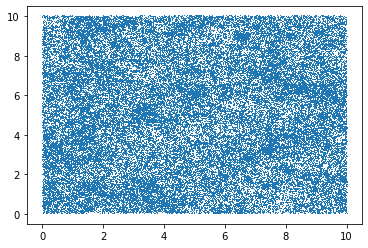

In [6]:
pl.plot(bright_merge_obs['RA'], bright_merge_obs['DEC'], marker=',', lw=0.0)

In [7]:
all_sky_deg2 = 4. * np.pi * (180. / np.pi)**2.
all_sky_deg2

41252.96124941928

In [8]:
fsky = 100. / all_sky_deg2
fsky

0.0024240684055476798

Text(0, 0.5, 'N per $\\Delta Z=0.025$')

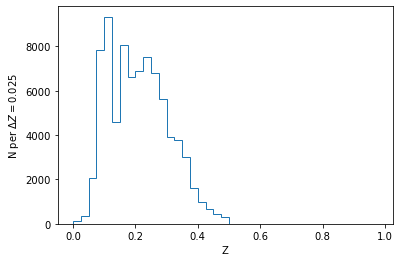

In [9]:
dz = 0.025
_  = pl.hist(bright_merge_obs['Z'], bins=np.arange(0.0, 1.0, dz), histtype='step')

pl.xlabel('Z')
pl.ylabel('N per $\Delta Z={:0.3f}$'.format(dz))

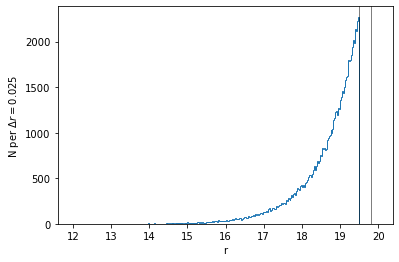

In [10]:
dr = 0.025
_  = pl.hist(bright_merge_obs['RMAG_DRED'], bins=np.arange(12.0, 20.0, dr), histtype='step')

pl.xlabel('r')
pl.ylabel('N per $\Delta r={:0.3f}$'.format(dr))

pl.axvline(19.5, c='k', lw=0.5)
pl.axvline(19.8, c='k', lw=0.5)

In [11]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_derived_v{:.1f}.fits'.format(version))
derived

TARGETID,INSAMPLE,VOLUME,MRH,ZMAX,IVMAX
float64,float64,float64,float64,float64,float64
0.0,0.0,20401010.34672233,-21.944438008701233,0.45192217818769254,5.291166715249059e-08
1.0,0.0,21020621.826476462,-21.58349088768941,0.42949726263687305,6.068359973247376e-08
2.0,0.0,23654315.659843307,-21.68503407932896,0.4504753577033329,5.336912467812422e-08
3.0,0.0,15067904.624427442,-21.694006848446836,0.4153936976444512,6.642363179191228e-08
4.0,0.0,12790806.928424224,-21.3457368816921,0.37039316594172916,9.083742130467794e-08
5.0,0.0,11393153.983618839,-21.50928145273749,0.3647159294756562,9.47776146425796e-08
6.0,0.0,8742894.846819622,-20.890544333420124,0.33158480846510385,1.2331691877094362e-07
7.0,0.0,7369672.081741017,-20.812640186331,0.3178142122344462,1.3875905345872108e-07
8.0,1.0,8512527.859442476,-21.594433657615397,0.41789967998248323,6.534919358634168e-08


In [12]:
bright_merge_obs = bright_merge_obs[:len(derived)]

In [14]:
isin = derived['INSAMPLE'].astype(bool)

derived = derived[isin]

In [15]:
np.mean(isin)

1.0

(0.95, 1.05)

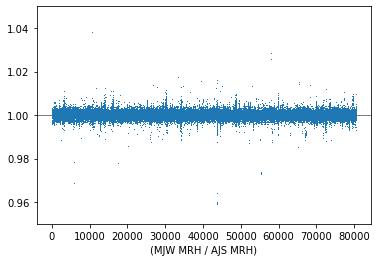

In [16]:
pl.axhline(1.0, lw=0.5, c='k')
pl.plot(derived['MRH'] / bright_merge_obs['MRH'], marker=',', lw=0.0)

pl.xlabel('(MJW MRH / AJS MRH)')

pl.ylim(0.95, 1.05)

Text(0, 0.5, '$zmax$')

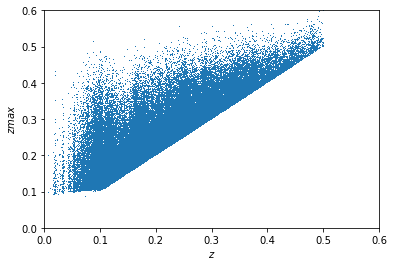

In [17]:
pl.plot(bright_merge_obs['Z'], derived['ZMAX'], marker=',', lw=0.0)

pl.xlim(0.0, 0.6)
pl.ylim(0.0, 0.6)

pl.xlabel(r'$z$')
pl.ylabel(r'$zmax$')

In [18]:
derived['PHIKERNEL']   = derived['IVMAX']

In [19]:
derived['MRH'].min(), derived['MRH'].max()

(-23.356245724668774, -17.548385694483216)

In [20]:
bins=np.arange(-24.0, -10.0, 0.5)
bins

array([-24. , -23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5, -20. ,
       -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5,
       -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. ,
       -10.5])

In [21]:
len(derived), len(bright_merge_obs)

(80502, 80502)

Text(0.5, 1.0, 'BGS Bright SV3')

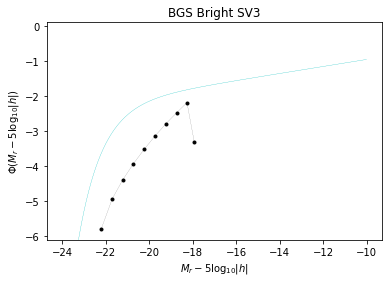

In [22]:
derived                   = derived[bright_merge_obs['Z'] < 0.1]

derived['MRH_IDX']        = np.digitize(derived['MRH'], bins=bins)

derived_grouped           = derived.group_by(['MRH_IDX'])
derived_grouped['NGROUP'] = 1 

derived_addbinned         = derived_grouped['MRH', 'PHIKERNEL', 'NGROUP'].groups.aggregate(np.add)
derived_mnbinned          = derived_grouped['MRH', 'PHIKERNEL'].groups.aggregate(np.mean)

derived_addbinned['MRH']  = derived_mnbinned['MRH']

isin                      = derived_addbinned['NGROUP'] > 10

## 
Ms = np.arange(-24., -10., 0.01)

pl.plot(derived_mnbinned['MRH'][isin], np.log10(derived_addbinned['PHIKERNEL'][isin]), marker='.', c='k', lw=0.1)
pl.plot(Ms, np.log10(schechter(Ms)), c='c', lw=0.25)

pl.ylim(-6.1, 0.1)

pl.xlabel(r'$M_r - 5\log_{10}|h|$')
pl.ylabel(r'$\Phi(M_r - 5\log_{10}|h|)$')

pl.title('BGS Bright SV3')

# Done.